# Feature Engineering

In [1]:
# Common libraries imports
import numpy as np
import pandas as pd
import sklearn
import plotly.express as px
import seaborn as sns

### Loading the data:

In [2]:
# Prepare our system to download the datasets from a repository
import os
import opendatasets as od

# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset'
# Using opendatasets let's download the data sets
od.download(dataset)

Skipping, found downloaded files in ".\airbnb-cleaned-europe-dataset" (use force=True to force download)


In [3]:
data_dir = './airbnb-cleaned-europe-dataset'

os.listdir(data_dir)

['Aemf1.csv']

In [4]:
airbnb = pd.read_csv('airbnb-cleaned-europe-dataset/Aemf1.csv')
airbnb

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


### Inspecting the data:

In [5]:
# Random 10 samples of data
airbnb.sample(10)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
40114,Vienna,359.488582,Weekend,Entire home/apt,False,False,6.0,True,0,0,10.0,97.0,2,1.522086,0.319101,133.496519,9.560140,199.419357,4.819889
17917,Lisbon,228.893058,Weekday,Entire home/apt,False,False,6.0,False,0,0,10.0,92.0,3,2.477789,0.508149,106.726781,3.523509,269.184193,12.038922
38062,Rome,278.680476,Weekend,Entire home/apt,False,False,4.0,False,0,1,10.0,80.0,1,2.203034,0.494711,691.711265,15.325170,1625.913305,35.424706
30860,Rome,236.831646,Weekday,Entire home/apt,False,False,4.0,False,0,1,10.0,80.0,1,2.169365,1.123637,818.003487,18.127119,1997.321226,43.487306
6691,Athens,96.079488,Weekend,Entire home/apt,False,False,4.0,False,0,0,10.0,100.0,2,2.255381,0.190108,110.392187,4.159328,154.323448,2.304657
15121,Budapest,155.097053,Weekend,Entire home/apt,False,False,4.0,True,0,1,9.0,100.0,1,0.378216,0.264572,283.576633,16.924967,735.340914,64.281995
8227,Barcelona,130.798054,Weekday,Private room,False,True,2.0,False,1,0,9.0,85.0,1,1.239561,0.543985,499.366909,17.019230,840.558904,18.503288
21126,Lisbon,378.283302,Weekend,Entire home/apt,False,False,4.0,False,0,1,10.0,98.0,1,1.139116,0.907672,180.363268,5.948970,583.655242,32.802968
8199,Barcelona,156.166360,Weekday,Private room,False,True,2.0,True,0,0,10.0,97.0,1,2.827833,0.286754,266.749649,9.091258,510.745556,11.243082
39255,Vienna,182.081668,Weekday,Entire home/apt,False,False,4.0,False,0,1,8.0,76.0,1,7.725443,1.972224,59.398376,4.253858,54.348871,1.299249


In [6]:
# Displaying all the Data Information
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [7]:
airbnb.shape # data shape

(41714, 19)

In [8]:
airbnb.describe() # data stats

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [9]:
mean, median = airbnb['Price'].mean(), airbnb['Price'].median()

print(f'The airbnb price mean is {mean:.2f}, while the median is {median}')

The airbnb price mean is 260.09, while the median is 203.8192740107052


In [10]:
airbnb.isnull().sum() # null values check

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [11]:
# Preliminary examination of the data set by creating a function(method)

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(airbnb)

##################### Shape #####################
(41714, 19)
##################### Types #####################
City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object
##################### Head #####################
        City       Price      Day     Room Type  Shared Room  Private Room  \
0  Ams

<h3>Identify Categorical and Numerical attributes</h3>

In [12]:
catvars  = airbnb.select_dtypes(include=['object']).columns
numvars = airbnb.select_dtypes(include=['int64', 'float64']).columns

print(catvars)

Index(['City', 'Day', 'Room Type'], dtype='object')


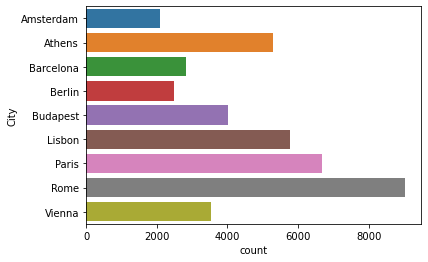

In [13]:
# Plot the number of instances per city
sns.countplot(data=airbnb, y='City');

In [14]:
airbnb['City'].value_counts() #identify the number per each city

City
Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: count, dtype: int64

In [16]:
# Displaying by rounding in 3 demicals
cormat = airbnb.corr(numeric_only=True)
round(cormat,3)

,Price,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
Price,1.000,-0.038,-0.150,0.180,-0.040,-0.055,0.014,0.004,0.016,0.207,-0.052,-0.039,0.169,0.271,0.113,0.219
Shared Room,-0.038,1.000,-0.059,0.042,-0.033,-0.019,0.057,-0.049,-0.035,-0.023,0.021,-0.016,-0.035,0.000,-0.033,0.004
Private Room,-0.150,-0.059,1.000,-0.476,-0.056,0.147,-0.022,-0.027,-0.053,-0.142,0.133,0.032,0.004,-0.001,0.007,-0.074
Person Capacity,0.180,0.042,-0.476,1.000,0.037,-0.058,0.100,0.010,0.017,0.559,-0.078,0.008,0.013,-0.052,0.022,-0.011
Superhost,-0.040,-0.033,-0.056,0.037,1.000,0.087,-0.092,0.280,0.292,0.024,-0.025,0.015,-0.023,-0.056,-0.034,-0.059
Multiple Rooms,-0.055,-0.019,0.147,-0.058,0.087,1.000,-0.466,0.034,0.040,-0.005,0.033,0.035,0.022,-0.022,0.024,-0.043
Business,0.014,0.057,-0.022,0.100,-0.092,-0.466,1.000,-0.077,-0.179,-0.022,-0.181,-0.066,0.087,0.021,0.113,0.090
Cleanliness Rating,0.004,-0.049,-0.027,0.010,0.280,0.034,-0.077,1.000,0.692,0.031,0.005,0.019,-0.024,-0.042,-0.031,-0.048
Guest Satisfaction,0.016,-0.035,-0.053,0.017,0.292,0.040,-0.179,0.692,1.000,0.043,0.031,0.025,-0.049,-0.025,-0.073,-0.048
Bedrooms,0.207,-0.023,-0.142,0.559,0.024,-0.005,-0.022,0.031,0.043,1.000,0.000,0.054,-0.015,-0.082,-0.016,-0.077


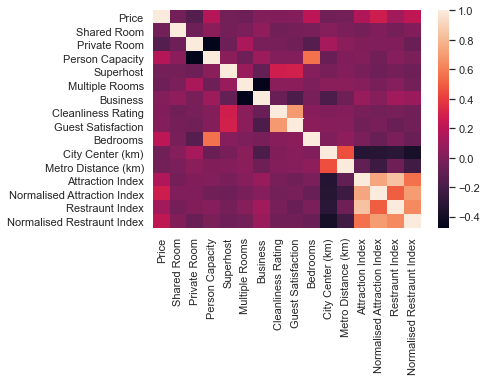

In [19]:
# Displaying the correlation with Seaborn library
import matplotlib.pyplot as plt

sns.set(font_scale=1.0)
sns.heatmap(cormat)

# save the plot as PNG file
plt.savefig("seaborn_plot.png")

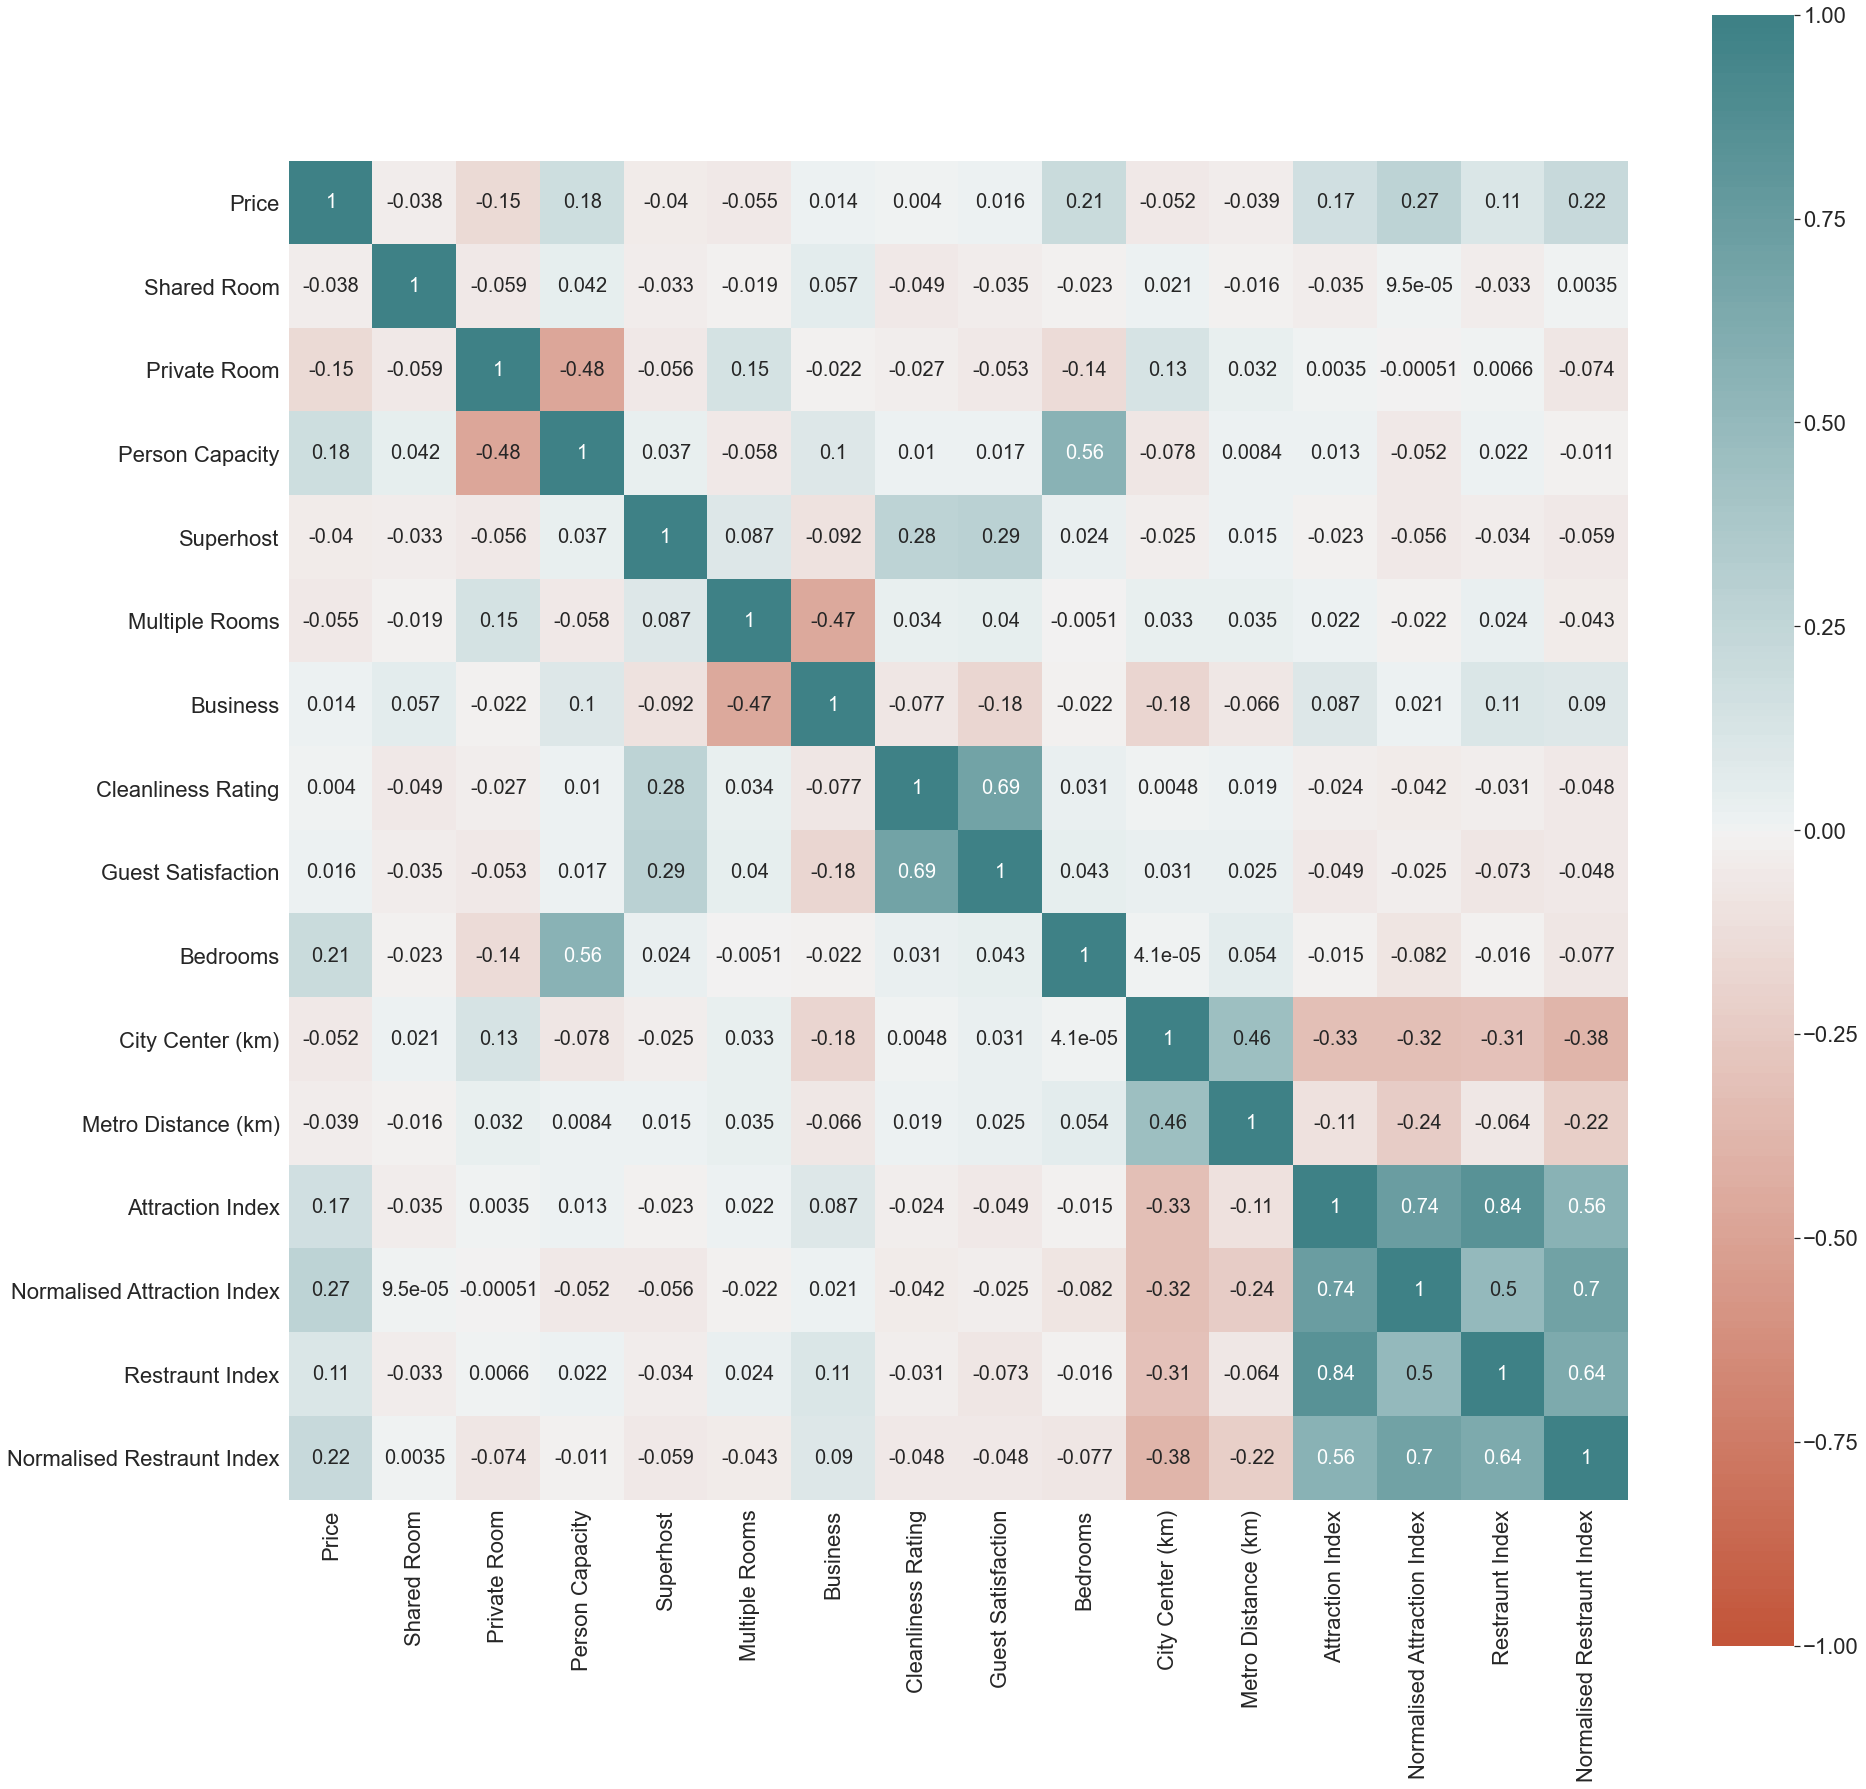

In [20]:
plt.figure(figsize = (30,30))

sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size': 20})

From this correlation matrix we can see that the Attraction/Restaurant Index and Normalised Attraction/Restaurant index are highly correlated (obiously). We should choose either the normalised or the regular index for both of these. 

Assuming we use the normalised index, we also see a high correlation between the Normalised Attraction Index and the Normalised Restraunt index (0.7). This means we might need to drop one of these.

Besides this, we see no extremely high correlation between independent variables. Hence, collinearity does not seem to be an issue.

<h3>Scatter plots</h3>
Finally, another way to check for correlations is to examine the scatter plots of each numeric column. This can be useful for detecting non-linear correlations which might be missed in the analysis above.

Index(['Price', 'Person Capacity', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')


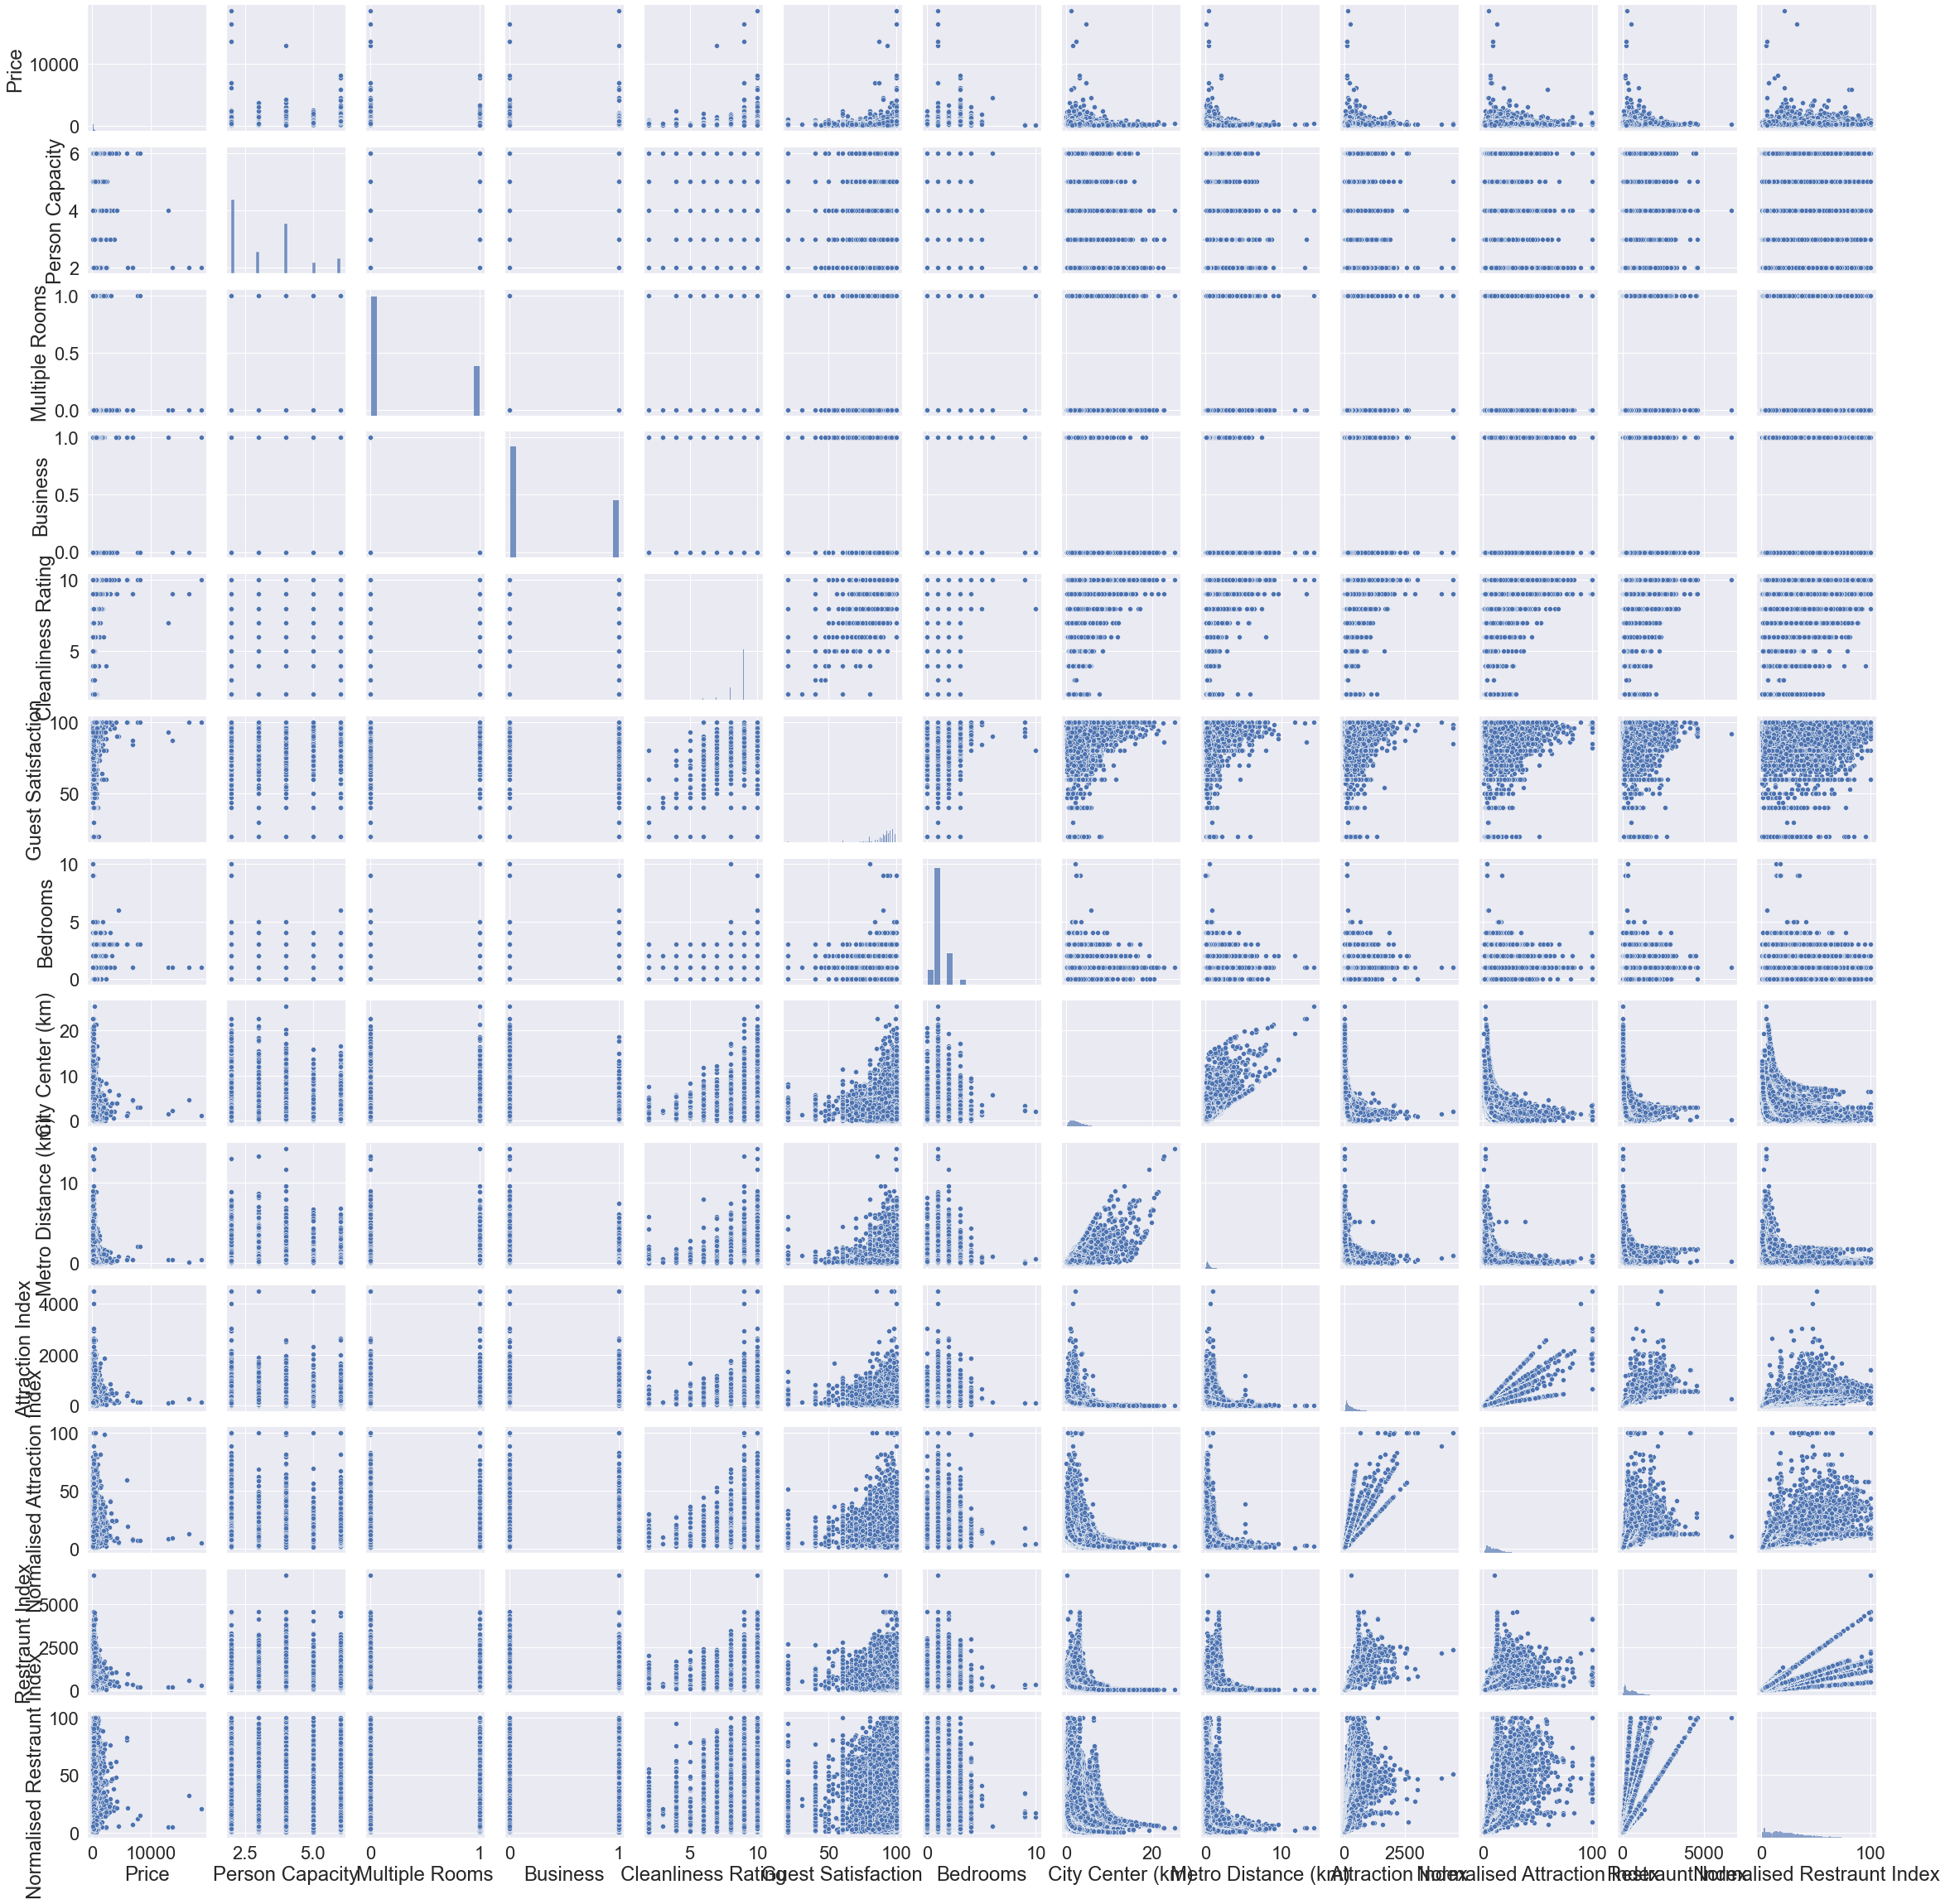

In [24]:
sns.pairplot(airbnb[numvars].dropna())
plt.show()

c:\Users\anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


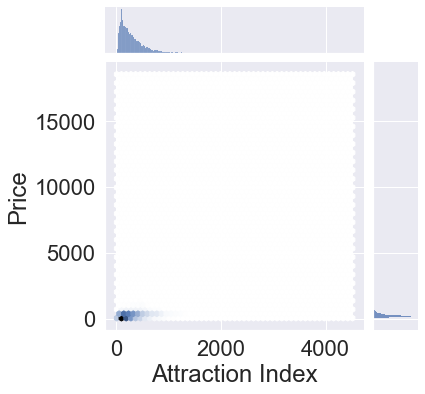

In [30]:
sns.jointplot('Attraction Index', 'Price', data=airbnb, kind='hex')

#### Boxplots

A boxplot is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers.

c:\Users\anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price')

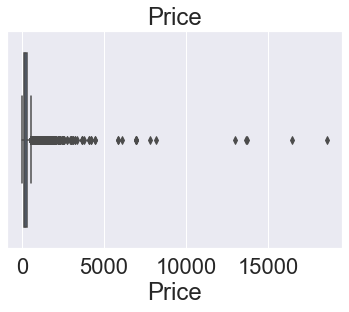

In [38]:
sns.boxplot(airbnb['Price'])
plt.title("Price")

c:\Users\anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


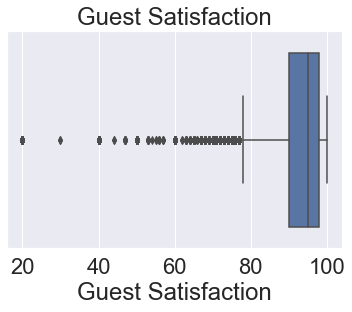

In [37]:
sns.boxplot(airbnb['Guest Satisfaction'])
plt.title("Guest Satisfaction");

c:\Users\anne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


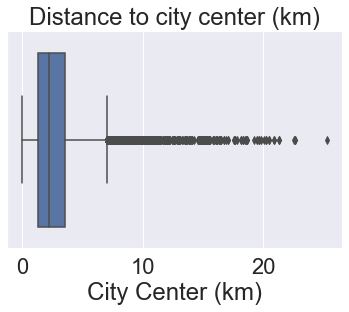

In [39]:
sns.boxplot(airbnb['City Center (km)'])
plt.title("Distance to city center (km)");

## Data Cleaning and Preprocessing

<h3>Handling Categorical Data</h3>

Three ways:

<ol><li>Ordinal Encoding</li>
<li>OneHot Encoding</li>
<li>Embeddings</li></ol>

In [42]:
#import the needed libraries and methods
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,FunctionTransformer

In [43]:
data_cat=airbnb[['City','Day','Room Type']]

In [44]:
#1st option
ordinal_encoder=OrdinalEncoder() #will map each category to a number
data_cat_encoded=ordinal_encoder.fit_transform(data_cat)
data_cat_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [8., 1., 0.],
       [8., 1., 1.],
       [8., 1., 1.]])

In [45]:
ordinal_encoder.categories_
#The disadvantage with this method is that ML algos might think that two 
#nearby values more similar than the far ones  

[array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon',
        'Paris', 'Rome', 'Vienna'], dtype=object),
 array(['Weekday', 'Weekend'], dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

In [46]:
#2nd option
onehot_encoder=OneHotEncoder()
# it will create new columns for each category
# column value will be one if the that value is present in the row
data_cat_encoded=onehot_encoder.fit_transform(data_cat)
data_cat_encoded.toarray()
#Disadvantage : training increases vey much if large number of 
#categorries are present

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Feature Engineering

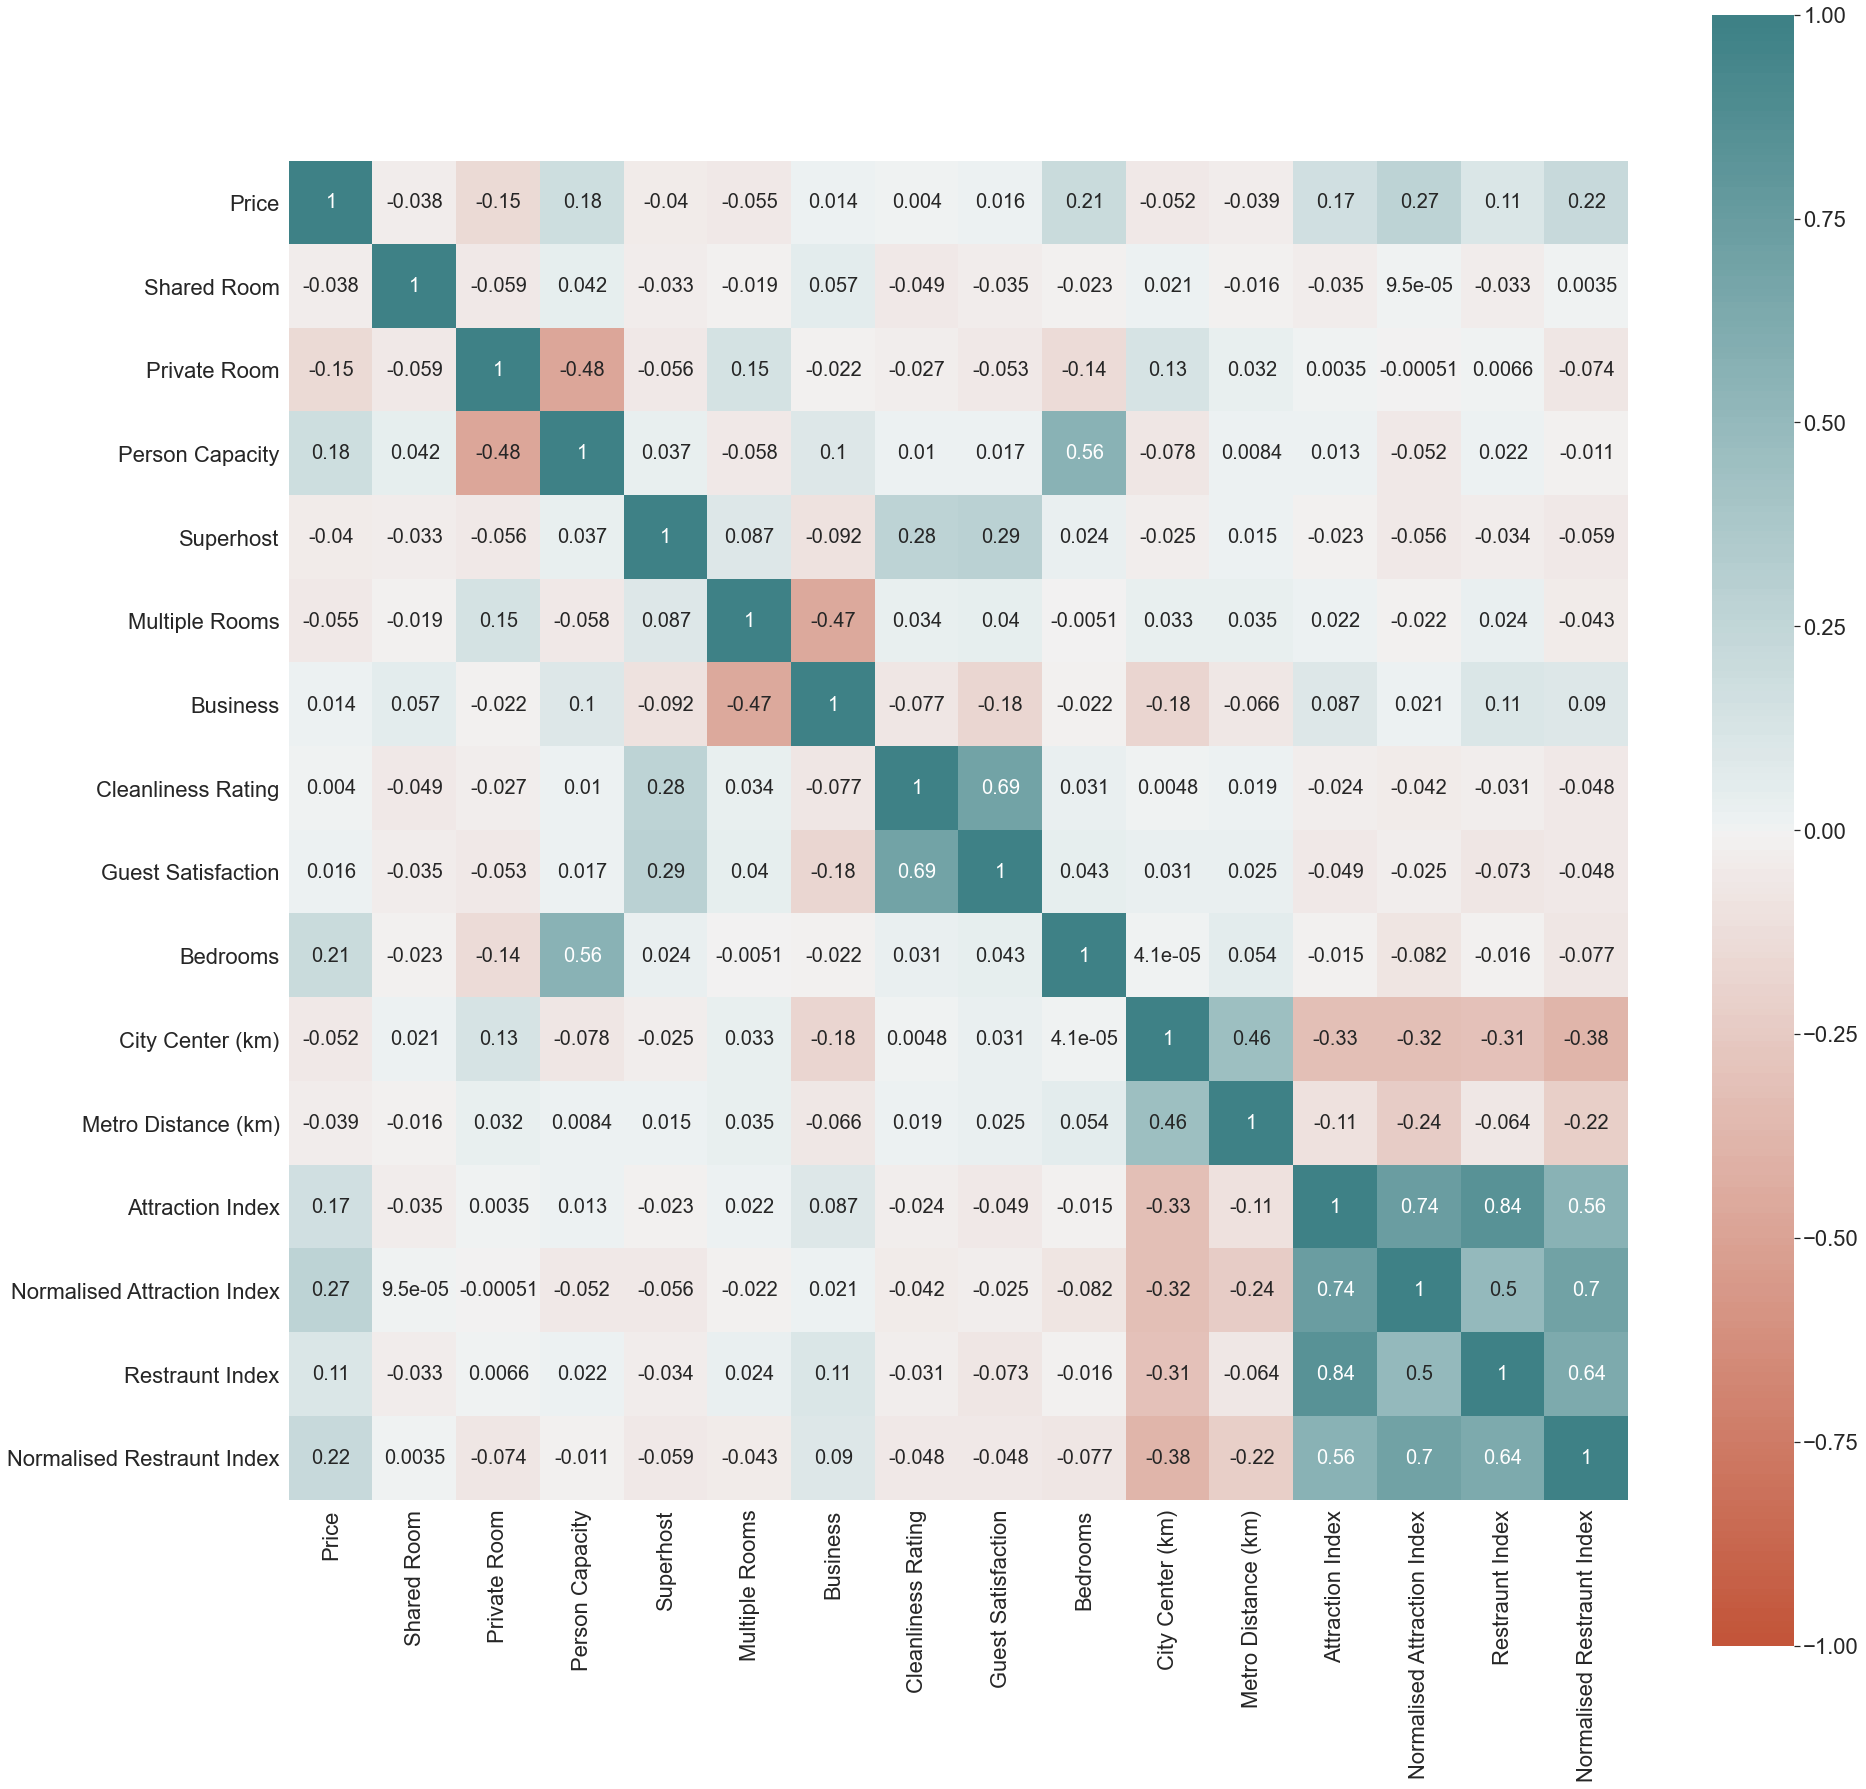

In [47]:
plt.figure(figsize = (30,30))

sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size': 20})

#### Feature Scaling

In [48]:
airbnb.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


Features are not in the same range. F.e., person capacity ranges from 2 to 6 but attraction index ranges from 15.15 to 4513.56. This could make model more biased toward attraction index. We will scale the numerical values.

Few scalers :

- Min-Max Scaling
- Standardization

In [49]:
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
# will bring value between -1 and 1
data_num=airbnb.select_dtypes(include=[np.number])
data_num_min_max_scaled=min_max_scaler.fit_transform(data_num)
data_num_min_max_scaled

array([[-0.98279324, -1.        ,  1.        , ..., -0.93458593,
        -0.97643195, -0.87417987],
       [-0.96656346,  0.        , -1.        , ..., -0.34402555,
        -0.75505308,  0.1618906 ],
       [-0.97522272, -1.        , -1.        , ..., -0.93823574,
        -0.97729076, -0.87819915],
       ...,
       [-0.93491434, -1.        , -1.        , ..., -0.77427671,
        -0.92130117, -0.87465222],
       [-0.97123013, -1.        , -1.        , ..., -0.86078037,
        -0.95836597, -0.93482046],
       [-0.98936277,  0.        ,  1.        , ..., -0.80119925,
        -0.9383905 , -0.90239377]])

In [50]:
std_scaler=StandardScaler(with_mean=True,with_std=True)
# z=(x-mean)/std_deviation
data_num=airbnb.select_dtypes(include=[np.number])
data_num_std_scaler=std_scaler.fit_transform(data_num)
data_num_std_scaler

array([[-0.23643346, -0.95212636,  1.54489524, ..., -0.90140773,
        -1.01498207, -1.01205162],
       [ 0.3011804 ,  0.58699393, -0.64729308, ...,  2.58997412,
         0.40448055,  1.77389719],
       [ 0.01434118, -0.95212636, -0.64729308, ..., -0.92298534,
        -1.02048866, -1.02285928],
       ...,
       [ 1.34956193, -0.95212636, -0.64729308, ...,  0.04633735,
        -0.66148817, -1.01332173],
       [ 0.14659621, -0.95212636, -0.64729308, ..., -0.46507066,
        -0.89914449, -1.17511153],
       [-0.4540501 ,  0.58699393,  1.54489524, ..., -0.1128282 ,
        -0.77106349, -1.08791756]])

In [51]:
std_scaler=StandardScaler(with_mean=True,with_std=True)
# z=(x-mean)/std_deviation
data_num=airbnb.select_dtypes(include=[np.number])
data_num_std_scaler=std_scaler.fit_transform(data_num)
data_num_std_scaler

array([[-0.23643346, -0.95212636,  1.54489524, ..., -0.90140773,
        -1.01498207, -1.01205162],
       [ 0.3011804 ,  0.58699393, -0.64729308, ...,  2.58997412,
         0.40448055,  1.77389719],
       [ 0.01434118, -0.95212636, -0.64729308, ..., -0.92298534,
        -1.02048866, -1.02285928],
       ...,
       [ 1.34956193, -0.95212636, -0.64729308, ...,  0.04633735,
        -0.66148817, -1.01332173],
       [ 0.14659621, -0.95212636, -0.64729308, ..., -0.46507066,
        -0.89914449, -1.17511153],
       [-0.4540501 ,  0.58699393,  1.54489524, ..., -0.1128282 ,
        -0.77106349, -1.08791756]])